In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
a = torch.Tensor(2,3)
print(a)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [3]:
import torch
a = torch.Tensor([2,3])
print(a)

tensor([2., 3.])


In [4]:
b = torch.FloatTensor([[1,2,3],[4,5,6]])
print(b)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [5]:
c = torch.cuda.FloatTensor([[1,2,3],[4,5,6]])
print(c)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')


In [6]:
import torch
x = torch.tensor(data=[2.0,3.0], requires_grad = True)
z = (2 * x**2 + 3).sum()
z.backward()
print(x)
print(z)
print(x.grad, z.grad)

tensor([2., 3.], requires_grad=True)
tensor(32., grad_fn=<SumBackward0>)
tensor([ 8., 12.]) None


C:\Users\USER\Anaconda3\envs\pytorch\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
torch.manual_seed(222)
num_data = 1000
num_epoch = 500
Learning_Rate = 0.01
#  -10에서 10 사이의 값의 균등한 분포이며, 1000x1의 배열로 만든다.
x = init.uniform_(torch.Tensor(num_data,1),-10,10)
#  가우시안 분포이며, 표준편차가 1인 float 형식의 값을 1000x1의 배열로 만든다.
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)

y = 2 * x + 3
y_noise = y + noise

# input feature 개수 = 1이고, output feature 개수 = 1인 Linear 클래스를 불러옴
input_num = 1
output_num = 1
model = nn.Linear(input_num, output_num)
# L1 손실을 불러옴
# L1 손실 = loss(x,y) = MAE
loss_func = nn.L1Loss()

# optimizer = Adam, learning rate = 0.01
W = torch.zeros(1, requires_grad=True) 
b = torch.zeros(1, requires_grad=True) 
optimizer = optim.Adam(model.parameters([W,b]),lr = Learning_Rate)

# W, b, Loss 저장
W_and_b = np.zeros((num_epoch,2))
Loss = np.zeros((num_epoch,1))

for i in range(num_epoch):
    for name, param in model.named_parameters():
        if name == "weight":
            W_and_b[i,0] = param.data[0][0]
        if name == "bias":
            W_and_b[i,1] = param.data[0] 
    # 각 반복 시 지난번에 계산한 기울기를 0으로 초기화 함
    #기울기를 초기화해야 새로운 가중치와 편차에 대해 새로운 기울기를 구할 수 있음.
    optimizer.zero_grad()
    # x를 넣었을 때 예측 값 = output
    # x = 1000x1이므로 output = 1000x1이다.
    output = model(x)
    # 예측값과 실제 값을 loss function(Mean Absolute Error)에 넣음
    loss = loss_func(output,y_noise)
    # loss에 대한 기울기 계산
    loss.backward()
    # 가중치 - 계산된 기울기 * 0.01 한후 업데이트 
    optimizer.step()
    Loss[i,0] = loss.data    
    if i % 10 == 0:
        print(i,loss.data)
Predict = model(torch.Tensor([[11],[12]]))
print("Predict(x=11) : ",Predict[0].data,"Predict(x=12) : ",Predict[1].data)

0 tensor(13.1464)
10 tensor(12.6373)
20 tensor(12.1283)
30 tensor(11.6193)
40 tensor(11.1103)
50 tensor(10.6017)
60 tensor(10.0935)
70 tensor(9.5854)
80 tensor(9.0774)
90 tensor(8.5696)
100 tensor(8.0619)
110 tensor(7.5549)
120 tensor(7.0489)
130 tensor(6.5450)
140 tensor(6.0426)
150 tensor(5.5416)
160 tensor(5.0411)
170 tensor(4.5425)
180 tensor(4.0484)
190 tensor(3.5591)
200 tensor(3.0762)
210 tensor(2.6042)
220 tensor(2.1454)
230 tensor(1.7065)
240 tensor(1.3108)
250 tensor(1.0002)
260 tensor(0.8348)
270 tensor(0.7851)
280 tensor(0.7815)
290 tensor(0.7810)
300 tensor(0.7801)
310 tensor(0.7794)
320 tensor(0.7792)
330 tensor(0.7792)
340 tensor(0.7792)
350 tensor(0.7792)
360 tensor(0.7792)
370 tensor(0.7792)
380 tensor(0.7792)
390 tensor(0.7792)
400 tensor(0.7792)
410 tensor(0.7792)
420 tensor(0.7792)
430 tensor(0.7792)
440 tensor(0.7792)
450 tensor(0.7792)
460 tensor(0.7792)
470 tensor(0.7792)
480 tensor(0.7792)
490 tensor(0.7792)
Predict(x=11) :  tensor([24.9124]) Predict(x=12) :  te

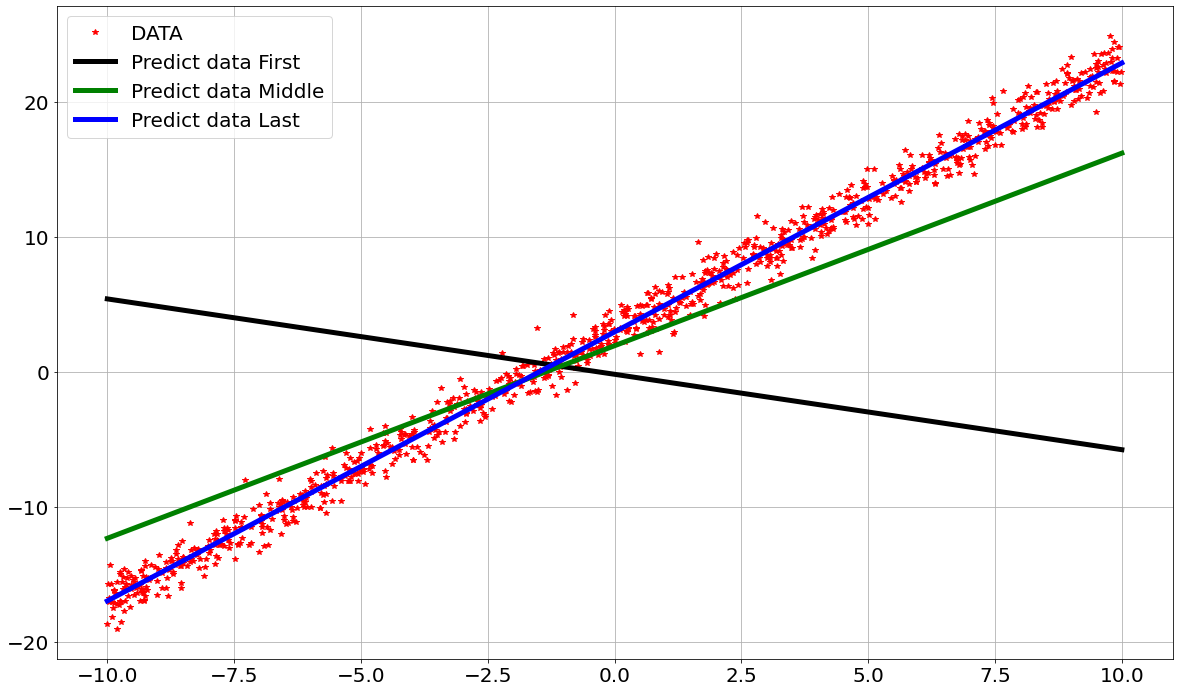

In [8]:
x_lin = np.linspace(-10,10,1000)
y_predict_first = W_and_b[0,0] * x_lin + W_and_b[0,1]
y_predict_middle = W_and_b[200,0] * x_lin + W_and_b[200,1]
y_predict_last = W_and_b[-1,0] * x_lin + W_and_b[-1,1]
plt.figure(figsize=[20,12])
plt.plot(x,y_noise,'r*',label = "DATA")
plt.plot(x_lin,y_predict_first,'k-',label = "Predict data First",linewidth = 5)
plt.plot(x_lin,y_predict_middle,'g-',label = "Predict data Middle",linewidth = 5)
plt.plot(x_lin,y_predict_last,'b-',label = "Predict data Last",linewidth = 5)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

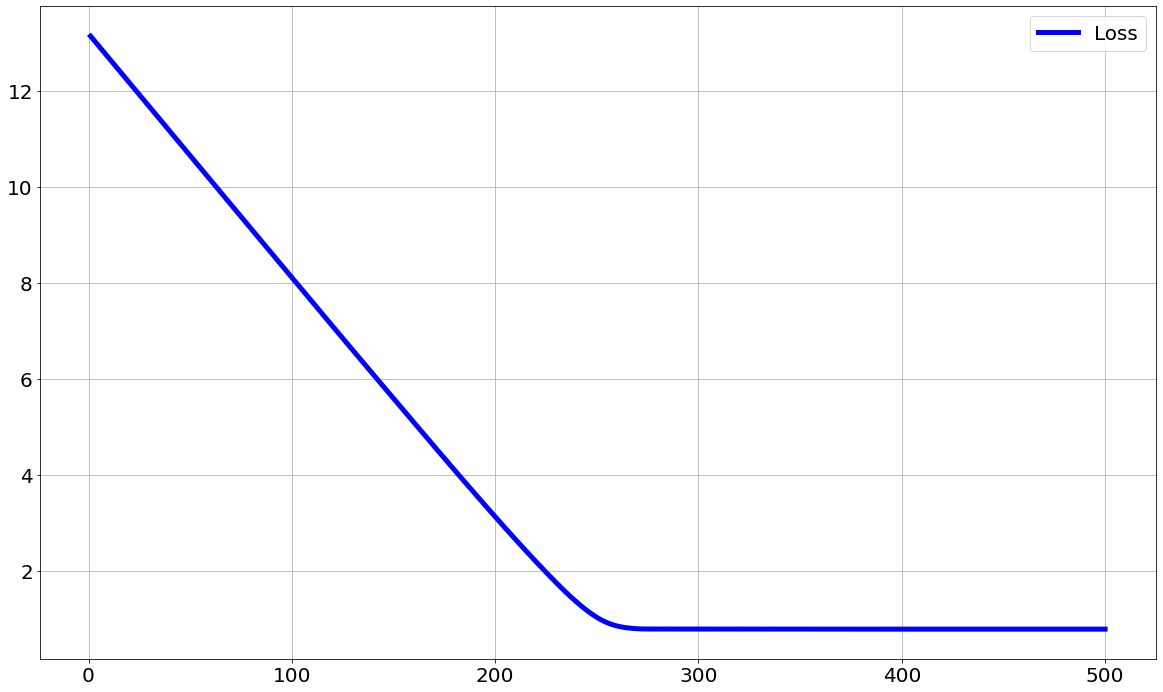

In [9]:
Epochs = np.linspace(1,num_epoch,num_epoch)
plt.figure(figsize=[20,12])
plt.plot(Epochs,Loss,'b-',label = 'Loss',linewidth = 5)
plt.grid()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [10]:
y_predicts = [W_and_b[0] ,W_and_b[200],W_and_b[-1]]

In [11]:
print("W : ",W_and_b[-1,0],"b : ",W_and_b[-1,1] )

W :  1.9951014518737793 b :  2.9663381576538086


In [12]:
np.savetxt("DATA_x.csv",x,delimiter=",")
np.savetxt("DATA_y.csv",y_noise,delimiter=",")
np.savetxt("DATA_y_predicts.csv",y_predicts,delimiter=",")
np.savetxt("DATA_y_W_and_b.csv",W_and_b,delimiter=",")
np.savetxt("Loss.csv",Loss,delimiter=",")

